In [1]:
# %pip install statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ipywidgets as widgets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display

### The Model

Модель визначається основною лінійною комбінацією вагової матриці `W` (weights), з нашими даними `X`, із зміщенням `b` (bias), доданим, щоб відсунути наш прогноз від початку.

In [3]:
def predict(w, b, x):
    """ A method that runs our linear model
    w : np.ndarray (1, num_dimensions)
        A weight matrix which will be fit to the data
    b : float (1, 1)
        The bias unit for our linear model
    x : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    """
    return w @ x + b

### The Cost Function

Функція втрат визначає ціль лінійної регресії. Загалом, важливо чітко визначити функцію втрат. Тут ми визначимо функцію втрат як середній квадрат відстані між нашим прогнозом для `y` та базовим істинним значенням для `y` у всіх навчальних прикладах.

* X = [50, 65, 100]
* y = [100, 145, 235]
* y_pred = [110 , 150, 250]

In [4]:
def cost(y, y_pred):
    """
    y : np.ndarray (num_examples, 1)
        The ground truth results
    y_pred : np.ndarray (num_examples, 1)
    """
    return ((y_pred - y) ** 2).mean()

### The Parameters

Нам потрібні значення для наших початкових параметрів. Параметри не обов’язково повинні бути близькими до ідеальних, це просто те, з чого можна почати прогнозування. Тут ми ініціалізуємо `W` вектором нулів, а `b` — 0. Ініціалізація параметра — це щось на зразок знань, які ви мали, коли народилися.

In [2]:
def initialize_parameters(n):
    """
    n : int
        The dimensions of the data
    """
    return np.zeros((1, n)), 0.0

### The Gradient

Ми використовуємо градієнт, щоб дізнатися, які значення повинні приймати наші параметри, щоб мінімізувати нашу функцію втрат. Формула для градієнта знаходиться, беручи похідну нашої функції витрат відносно `W` і `b`. Градієнт дає нам напрямок, у якому ми повинні змістити `W` і `b`, щоб мінімізувати нашу функцію втрат. 

**Пам’ятайте: мінімізуючи нашу функцію витрат, ми, за визначенням, зменшуємо квадратичні відстані між прогнозом нашої моделі для наших навчальних даних і основною правдою `y`.**

In [3]:
def gradient(x, y, y_pred):
    """
    x : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    y : np.ndarray (num_examples, 1)
        The ground truth results
    y_pred : np.ndarray (num_examples, 1)
        Our model's predictions
    """
    dw = ((y_pred - y) * x).mean()
    db = (y_pred - y).mean()
    return dw, db

### The Optimization Algorithm

Тут розглянемо два алгоритми оптимізації: градієнтний спуск і нормальне рівняння.

Градієнтний спуск передбачає використання градієнта для мінімізації функції вартості протягом багатьох послідовних ітерацій, поки вона не зійдеться (тобто досягне найнижчої точки). Градієнтний спуск має два основні параметри, які потрібно налаштувати: кількість епох (тобто кількість ітерацій) і швидкість навчання (значення, яке масштабує швидкість, за якою коригуються наші значення `W` і `b`). Якщо кількість епох і швидкість навчання достатньо встановлені, градієнтний спуск має сходитися до значення для `W` і `b`.

**Кінцева мета оптимізації — знайти такі значення параметрів W (weight) і b (bias), за яких функція помилки досягне свого мінімуму.**

In [4]:
# Градієнтний спуск для оптимізації ваг та зміщення
def gradient_descent(x, y, w, b, epochs=1000, learning_rate=0.0025): # lr: 0.1 --> 0.0x [0.01 -> 0.00001]
    """
    x : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    y : np.ndarray (num_examples, 1)
        The ground truth results
    w : np.ndarray (1, num_dimensions)
        A weight matrix which will be fit to the data
    b : float
        The bias unit for our linear model
    epochs : int
        The number of times our model iterates over the entire training set
    learning_rate : float
        The rate at which our model tends to adjust it's parameters
    """
    for i in range(epochs):
        # передбачуємо значення y з використанням поточної моделі
        y_pred = predict(w, b, x)
        
        # обчислюємо градієнт відносно w та b
        dw, db = gradient(x, y, y_pred)
        
        # коригуємо w та b для мінімізації функції втрат
        w -= learning_rate * dw
        b -= learning_rate * db
        
    return w, b

Нормальне рівняння є альтернативною технікою розв’язання для `W` і `b`. Зауважте, що цей алгоритм дорівнює `O(n³)`, де n – кількість навчальних прикладів.

In [5]:
def solve(x, y):
    """
    x : np.ndarry (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    y : np.ndarray (num_examples, 1)
        The ground truth results 
    """
    # отримуємо розмірність x
    m, n = x.shape
    
    # конкатенуємо рядок з одиницями з нашими тренувальними даними
    x = np.concatenate((np.ones((1, n)), x), axis=0)
    
    # використовуємо нормальне рівняння
    w = np.linalg.inv((x @ x.T)) @ (x @ y.T)
    
    # витягаємо значення w та b з обчислення
    w, b = w[1:,].reshape(1, m), float(w[0,])
    
    return w, b

### Putting it together

Давайте зберемо все разом. Спочатку ми ініціалізуємо наші параметри, `W` і `b`. Потім ми запустимо градієнтний спуск із цими параметрами та нашими навчальними даними, `X` та `y`, що дасть нам навчені `W` та `b`. Звідти ми можемо розрахувати усереднення втрат для всіх прикладів навчання.

In [6]:
def model(x, y, epochs=50000, learning_rate=0.0025, normal=False):
    
    # якщо користувач хоче використовувати нормальне рівняння
    if normal:
        # знаходимо w та b
        w, b = solve(x, y)
        
    # якщо користувач хоче використовувати градієнтний спуск
    else:
        # ініціалізуємо w та b
        w, b = initialize_parameters(x.shape[0])
        
        # запускаємо градієнтний спуск для пошуку оптимальних значень w та b
        w, b = gradient_descent(x, y, w, b, epochs=epochs, learning_rate=learning_rate)
        
    # обчислюємо остаточну функцію втрат
    c = cost(y, predict(w, b, x))
    
    # виводимо деталі моделі
    print('w:', w)
    print('b:', b)
    print('cost:', c)

<center>
    <img src="assets/1*w7xxhJu2HSnw8BGAhDukcw.gif">
</center>


### Linear Regression from Scratch

In [7]:
# Завантаження датасету (припустимо, що вибрали датасет з двома ознаками)
from sklearn.datasets import load_diabetes

In [8]:
diabetes = load_diabetes()

In [10]:
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

In [11]:
# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((353, 1), (89, 1))

In [14]:
# Додамо стовбець одиниць для врахування зсуву (bias)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

In [15]:
# Визначення функції для візуалізації
def plot_regression_and_loss(learning_rate):
    # Ініціалізація ваг моделі
    theta = np.random.randn(X_train_bias.shape[1], 1) # W - weights, theta

    # Градієнтний спуск
    loss_values = []
    for epoch in range(1000):
        gradients = 2/X_train_bias.shape[0] * X_train_bias.T.dot(X_train_bias.dot(theta) - y_train.reshape(-1, 1))
        theta = theta - learning_rate * gradients
        loss = mean_squared_error(y_train, X_train_bias.dot(theta))
        loss_values.append(loss)

    # Відображення результатів
    plt.figure(figsize=(12, 6))

    # Побудова графіка втрат по градієнту
    plt.subplot(1, 2, 1)
    plt.plot(range(len(loss_values)), loss_values, label='Loss')
    plt.xlabel('Епохи')
    plt.ylabel('Середньо-квадратична помилка')
    plt.title('Втрати по градієнту')
    plt.legend()

    # Побудова лінії регресії
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='black')
    X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    y_pred = X_test_bias.dot(theta)
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title('Лінійна регресія (Test Set)')
    plt.xlabel('Ознака')
    plt.ylabel('Цільова змінна')

    plt.tight_layout()
    plt.show()

# Визначення ползунка для learning_rate
learning_rate_slider = widgets.FloatSlider(value=0.01, min=0.00001, max=0.1, step=0.0001, description='Learning Rate')

# Створення інтерактивної візуалізації
interactive_plot = widgets.interactive(plot_regression_and_loss, learning_rate=learning_rate_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.01, description='Learning Rate', max=0.1, min=1e-05, step=0.0001), O…

## [sklearn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [16]:
# Завантаження датасету (припустимо, що вибрали датасет з двома ознаками)
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Ініціалізація та навчання моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Отримання прогнозів для тестового набору
y_pred = model.predict(X_test)

In [19]:
# Виведення коефіцієнтів та середньо-квадратичної помилки
print("Коефіцієнти моделі: ", model.coef_)
print("Середньо-квадратична помилка: ", mean_squared_error(y_test, y_pred))

Коефіцієнти моделі:  [998.57768914]
Середньо-квадратична помилка:  4061.8259284949263


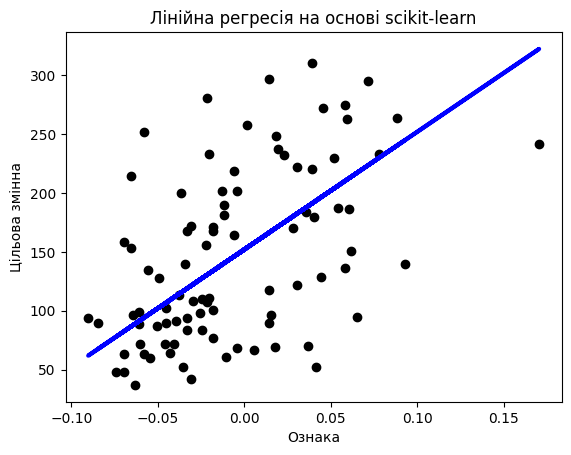

In [20]:
# Візуалізація результатів
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Лінійна регресія на основі scikit-learn')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.show()

## [statsmodels OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     202.4
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.40e-36
Time:                        21:09:15   Log-Likelihood:                -1958.2
No. Observations:                 353   AIC:                             3920.
Df Residuals:                     351   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.0034      3.316     45.841      0.0

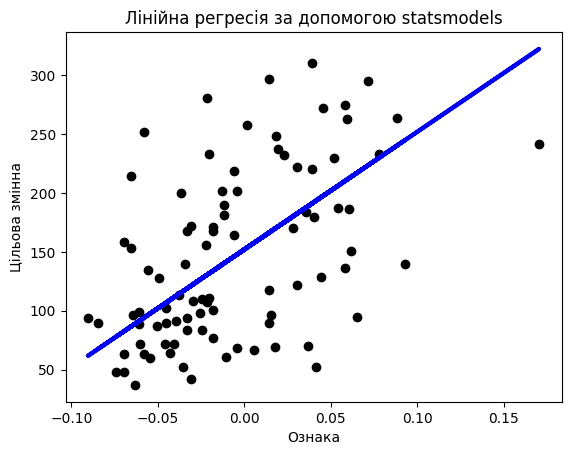

In [21]:
# Завантаження датасету (припустимо, що вибрали датасет з двома ознаками)
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Додамо стовбець одиниць до матриці X для врахування зсуву (bias)
X_train = sm.add_constant(X_train)

# Навчання моделі
model = sm.OLS(y_train, X_train)
results = model.fit()

# Виведення статистичної інформації про модель
print(results.summary())

# Додамо стовбець одиниць до тестового набору для врахування зсуву (bias)
X_test = sm.add_constant(X_test)

# Прогнозування на тестовому наборі
y_pred = results.predict(X_test)

# Візуалізація результатів
plt.scatter(X_test[:, 1], y_test, color='black')
plt.plot(X_test[:, 1], y_pred, color='blue', linewidth=3)
plt.title('Лінійна регресія за допомогою statsmodels')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.show()

## Multiple linear regression

Множинна лінійна регресія (Multiple Linear Regression) - це розширена форма лінійної регресії, де спроба передбачити залежну (цільову) змінну від двох або більше незалежних змінних. У випадку множинної лінійної регресії функція, яка описує залежність між вхідними ознаками та цільовою змінною, має вигляд лінійного рівняння з багатьма коефіцієнтами.

In [23]:
# Завантаження датасету (припустимо, що вибрали датасет з двома ознаками)
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data  # Всі ознаки
y = diabetes.target

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізація та навчання моделі множинної лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Отримання прогнозів для тестового набору
y_pred = model.predict(X_test)

# Виведення коефіцієнтів та середньо-квадратичної помилки
print("Коефіцієнти моделі: ", model.coef_)
print("Середньо-квадратична помилка: ", mean_squared_error(y_test, y_pred))

# Виведення коефіцієнта зсуву (intercept)
print("Зсув (intercept): ", model.intercept_)

# Визначення фактичного та передбаченого значень для порівняння
comparison = pd.DataFrame({'Фактичні значення': y_test, 'Передбачені значення': y_pred})

Коефіцієнти моделі:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Середньо-квадратична помилка:  2900.193628493483
Зсув (intercept):  151.34560453985995


In [25]:
comparison

,Фактичні значення,Передбачені значення
0,219.0,139.547558
1,70.0,179.517208
2,202.0,134.038756
3,230.0,291.417029
4,111.0,123.789659
...,...,...
84,153.0,115.011800
85,98.0,78.955842
86,37.0,81.560873
87,63.0,54.379973


## Metrics

#### Squared loss ([sklearn r2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)):

Squared Loss (сума квадратів помилок), також відомий як R-squared або коефіцієнт детермінації, є метрикою для оцінки якості моделі регресії. Ця метрика вимірює відстань між фактичними та передбаченими значеннями та дозволяє визначити, наскільки добре модель підходить для опису варіації вихідної змінної.

Використання R-squared важливо для оцінки ефективності моделі регресії, оскільки воно надає інформацію про те, яка частина варіації вихідної змінної пояснюється моделлю. Однак слід зауважити, що R-squared може бути неінформативним у випадку нелінійних моделей та у випадку використання неправильних змінних для передбачення. Також він може зростати, коли додаються нові ознаки, навіть якщо вони не є дійсно корисними для моделі. Тому R-squared слід використовувати разом із іншими метриками та уважно аналізувати результати.

$$ R_2 = \sum_{n=1}^{N} (y^{(n)} - f(x^{(n)}; W))^2 $$

#### Mean Squared Error (MSE) ([sklearn mse](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)):

MSE (Mean Squared Error або Середньоквадратична помилка) є метрикою, яка використовується для вимірювання середнього квадрату різниці між фактичними та передбаченими значеннями в моделі регресії. Ця метрика враховує квадратичні відхилення кожного прогнозу від відповідного фактичного значення і визначає, наскільки точно модель передбачає дані.

MSE має кілька важливих властивостей:

- Позитивні значення: MSE завжди буде позитивним, оскільки враховує квадратичні відхилення.
- Чутливість до великих помилок: Оскільки відхилення вводяться у квадрат, великі помилки будуть мати великий вплив на MSE.
- Міра розмаху відхилень: Величина MSE є квадратом величини середньої помилки, що робить її чутливою до значних відхилень в даних.

MSE використовується для оцінки якості моделі регресії, і є частиною багатьох методів навчання моделей, таких як метод найменших квадратів. В основному, мета полягає в тому, щоб зменшити MSE, тобто зменшити середнє квадратичне відхилення між фактичними та передбаченими значеннями, для поліпшення точності моделі.

$$ \textit{MSE} = \frac{1}{N} \sum_{n=1}^{N} (y^{(n)} - f(x^{(n)}; W))^2 $$

#### Root-mean-square error (RMSE) ([sklearn rmse](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.root_mean_squared_error.html)):

RMSE (Root Mean Squared Error або Квадратний корінь із середньоквадратичної помилки) є модифікацією MSE, яка використовується для вимірювання середнього квадрату кореневого значення різниці між фактичними та передбаченими значеннями в моделі регресії. Основна відмінність між MSE і RMSE полягає в тому, що RMSE виражається в тих же одиницях, що і вихідна змінна, що полегшує інтерпретацію результатів.

Основні властивості RMSE включають:

- Має ті ж обмеження, що і MSE: Як і MSE, RMSE завжди буде позитивним і чутливим до великих помилок, оскільки враховує квадратичні відхилення.
- Виражений у тих же одиницях, що і вихідна змінна: Основна відмінність між MSE і RMSE полягає в тому, що RMSE взято до квадратного кореня, що робить його вираженим в тих же одиницях, що і вихідна змінна. Це полегшує порівняння помилок між різними змінними та сприяє інтерпретації результатів.
  
RMSE використовується для того, щоб визначити середній розмір помилок, які робить модель у прогнозуванні. Чим менше RMSE, тим точніше модель. Використовуючи RMSE, ми можемо легше порівнювати точність різних моделей та визначати, наскільки добре модель підходить для передбачення даних.

$$ \textit{RMSE} = \sqrt{ \frac{1}{N} \sum_{n=1}^{N} (y^{(n)} - f(x^{(n)}; W))^2} $$